### Applying NBSVM to CSPS Curriculum data

This kernel follows Jeremy Howards notebook _"NB-SVM strong linear baseline"_ to classify datapoints using a string (here, a description of a given course) using sklearn's logistic regression instead of a SVM.

In [713]:
import pandas as pd
import numpy as np
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression


pd.set_option('display.max_columns', None)

In [714]:
df = pd.read_excel('metadata.xlsx')
df.columns = df.iloc[0]
df = df.drop([0])
df.reset_index(drop=True, inplace=True)

In [715]:
# Re-indexing 'df'
df.drop([0], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [716]:
df

,title EN/Titre EN,simple description EN/description simple ang,description for GCcampus EN/description pour GCcampus ang,GCdoc English link -\nlien anglais en version PDF,GCcampus URL EN/ang,Course type EN/Type de cours ang,Course Code/\nCode de cours (Legacy),title FR/Titre FR,simple description FR/description simple fra,description for GCcampus FR/description pour GCcampus fra,GCdoc French link \n-lien français en version PDF,GCcampus URL FR/fra,Course type FR/Type de cours fra,Provider Code/ Code du fournisseur (vubiz/skillsoft),Duration HH:MM,Certification Program (prerequisite),ILMS Course ID,Deeplink ENG,Offering ID eng,Deeplink FRA,Offering ID fra,Employees / Employés,Manager and Supervisor / Gestionnaires et superviseurs,Manager / Gestionnaires,Supervisor / Superviseurs,Executives / Cadres,Directors / Directeurs,DG / DG,ADM / SMA,Professional Specialists/Spécialistes professionnels Communications,ATIP / AIPRP,Communications/Communications,Evaluation/Évaluation,Finance/Finance,Human Resources Professionals/Professionnels en ressources humaines,Building the Workforce SUB TOPIC,Operational Effectiveness SUB TOPIC,Talent Management SUB TOPIC,Workplace Management SUB TOPIC,Information Management/Gestion de l'information,information technology/Technologie de l'information (TI),Internal Auditor/Vérificateurs internes,Materiel Management/Gestion du matériel,Policy/Politique,Procurement/Acquisition,Real Property/Biens immobiliers,Regulators/Responsables de la réglementation,Security/Sécurité,Service Specialists / spécialistes de service,Classroom / En classe,Online Self Paced / En ligne - à rythme libre,Virtual Classroom / Salle de classe virtuelle,Checklist / Liste de vérification,Decision table / Table décisionnelle,Decision tree / Arbre décisionnel,Flow chart / Diagramme de processus,Form \ Formulaire,Infographic / Infographie,Quick reference tool / Outil de référence rapide,Resource / Ressource,Step-by-step / Étape par étape,Template / Gabarit,Worksheet / Feuille de travail,Communications / Communications,Finance / Finance,Government Priorities / Priorités gouvernementales,Respectful and Inclusive Workplace / Milieu de travail respectueux et inclusif,Official Languages / Langues officielles,Service Excellence / Excellence du service,Values and Ethics / Valeurs et éthique,How Government Works / Les rouages du gouvernement,Human Resources / Ressources humaines,Information Management / Gestion de l'information,Information Technologies / Technologies de l'information,Leadership / Leadership,Personal Development / Perfectionnement personnel,Career Development / Perfectionnement professionnel,Communication Skills / Compétences en communication,Personal and Team Development / Perfectionnement personnel et perfectionnement de l’équipe,Policy & Regulation / Politiques et régulations,Procurement / Acquisitions,Security / Sécurité,Aspiring Directors Program / Programme à l'intention des futurs directeurs,Authority Delegation Training / Formation sur la délégation de pouvoirs,Executive Programs / Programmes à l’intention des cadres,Directors General Program / Programme à l'intention des directeurs généraux,EXLDP for EX-01 to EX-03 - PDLCS de niveau EX-01 à EX-03,ADM EXLDP / PDLCS pour les SMA,New Directors Program / Programme à l'intention des nouveaux directeurs,Manager Development Program / Programme de perfectionnement des gestionnaires,Supervisor Development Program / Programme de perfectionnement des superviseurs,Briefing Series / Série breffage,Essentials Series / Série des essentiels,ATIP essentials / Essentiels AIPRP,Communications essentials / Essentiels des communications,Finance essentials / Essentiels des finances,HR essentials / Essentiels des RH,IM essentials / Essentiels de la gestion de l'information,IT essentials / Essentiels des TI,Gcdocs / Gcdocs,GCTools / Outils GC,GBA+ / ACS+,Indigenous Learning series / Série d'apprentissage sur les cultures Autochtones,Language Maintenance Tools / Outils de maintien des acquis l

In [717]:
#df.iloc[:, 63:82]

In [718]:
# Initialize 'sa' as the dataframe of all Courses, their descriptions, and their type(s)
sa = df.iloc[:, 0:3]
sa.columns = ['Title', 'Simple_Desc', 'GC_Desc']

# Initialize 'append' to contain all course types

#pd.options.mode.chained_assignment = None  # default='warn'

append = df.iloc[:, 63:82]
append.fillna(0, inplace=True)
append[append == 'X'] = 1
append[append == 'x'] = 1
append.columns = [x.split('/')[0] for x in append.columns]
sa = sa.join(append)

In [719]:
sa.head()

,Title,Simple_Desc,GC_Desc,Communications,Finance,Government Priorities,Respectful and Inclusive Workplace,Official Languages,Service Excellence,Values and Ethics,How Government Works,Human Resources,Information Management,Information Technologies,Leadership,Personal Development,Career Development,Communication Skills,Personal and Team Development,Policy & Regulation,Procurement,Security
0,Security Awareness (A230),All public servants are required to contribute...,All public servants are required to contribute...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Fundamentals of Writing for the Web (A313),As more and more Canadians turn to the Interne...,As more and more Canadians turn to the Interne...,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Harmonized Threat and Risk Assessment (HTRA) (...,Physical and IT security specialists within th...,Physical and IT security specialists within th...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Value-added Oversight of Public Resources: The...,This course is an excellent introduction for a...,This course is an excellent introduction for a...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Being Brief: Making a Request Efficiently (B196),The way in which public servants communicate i...,The way in which public servants communicate i...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [720]:
sa['Simple_Desc'] = sa['Simple_Desc'].fillna("")
sa['GC_Desc'] = sa['GC_Desc'].fillna("")
sa = sa.dropna()
sa = sa[(sa['Simple_Desc'] != "") | (sa['GC_Desc'] != "")]
sa.reset_index(drop=True, inplace=True)

sa.head()

,Title,Simple_Desc,GC_Desc,Communications,Finance,Government Priorities,Respectful and Inclusive Workplace,Official Languages,Service Excellence,Values and Ethics,How Government Works,Human Resources,Information Management,Information Technologies,Leadership,Personal Development,Career Development,Communication Skills,Personal and Team Development,Policy & Regulation,Procurement,Security
0,Security Awareness (A230),All public servants are required to contribute...,All public servants are required to contribute...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Fundamentals of Writing for the Web (A313),As more and more Canadians turn to the Interne...,As more and more Canadians turn to the Interne...,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Harmonized Threat and Risk Assessment (HTRA) (...,Physical and IT security specialists within th...,Physical and IT security specialists within th...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Value-added Oversight of Public Resources: The...,This course is an excellent introduction for a...,This course is an excellent introduction for a...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Being Brief: Making a Request Efficiently (B196),The way in which public servants communicate i...,The way in which public servants communicate i...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [721]:
# Merge 'Simple_Desc' & 'GC_Desc' to a single 'desc' column
sa['desc'] = sa['Simple_Desc'].map(str) + ' ' + sa['GC_Desc'].map(str)
sa['desc'] = sa['desc'].apply(lambda x: ' '.join(pd.unique(x.split())))
sa = sa.drop(['Simple_Desc', 'GC_Desc'], axis=1)
sa.head()

,Title,Communications,Finance,Government Priorities,Respectful and Inclusive Workplace,Official Languages,Service Excellence,Values and Ethics,How Government Works,Human Resources,Information Management,Information Technologies,Leadership,Personal Development,Career Development,Communication Skills,Personal and Team Development,Policy & Regulation,Procurement,Security,desc
0,Security Awareness (A230),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,All public servants are required to contribute...
1,Fundamentals of Writing for the Web (A313),1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,As more and Canadians turn to the Internet for...
2,Harmonized Threat and Risk Assessment (HTRA) (...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Physical and IT security specialists within th...
3,Value-added Oversight of Public Resources: The...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,This course is an excellent introduction for a...
4,Being Brief: Making a Request Efficiently (B196),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,The way in which public servants communicate i...


In [722]:
train, test = train_test_split(sa, test_size=0.25)

In [723]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [724]:
# The length of the descriptions varies quite a bit

lens = train.desc.str.len()
lens.mean(), lens.std(), lens.max()

(300.5890603085554, 203.07453035808078, 1149)

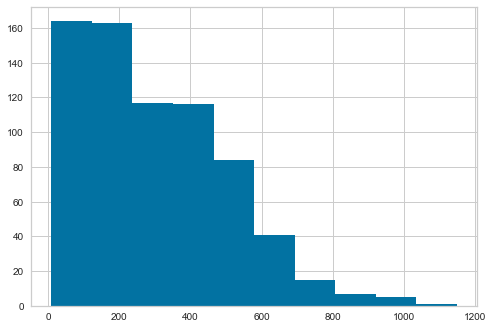

In [725]:
lens.hist()

In [726]:
label_cols = ['Communications ', 'Finance ', 'Government Priorities ', 'Respectful and Inclusive Workplace ', 'Official Languages ', 'Service Excellence ', 'Values and Ethics ', 'How Government Works ', 'Human Resources ', 'Information Management ', 'Information Technologies ', 'Leadership ', 'Personal Development ', 'Career Development ', 'Communication Skills ', 'Personal and Team Development ', 'Policy & Regulation ', 'Procurement ', 'Security ']
#train['none'] = 1-train[label_cols].max(axis=1)
#train.describe()

In [727]:
len(train),len(test)

(713, 238)

### Building the Model

We'll start by creating a bag of words representation, as a term document matrix. Here we use ngrams, as suggested in the NBSVM paper & kaggle kernel.

In [728]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [729]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
trn_term_doc = vec.fit_transform(train['desc'])
test_term_doc = vec.transform(test['desc'])

In [730]:
trn_term_doc, test_term_doc

(<713x3550 sparse matrix of type '<class 'numpy.float64'>'
 	with 39413 stored elements in Compressed Sparse Row format>,
 <238x3550 sparse matrix of type '<class 'numpy.float64'>'
 	with 12413 stored elements in Compressed Sparse Row format>)

___The basic naive bayes feature equation:___

In [731]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [732]:
x = trn_term_doc
test_x = test_term_doc

Fit a model for one dependent at a time:

In [733]:
def get_mdl(y):
    y = y.values
    y = y.astype('int')
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=False)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [734]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fitting ', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]
    

fitting  Communications 
fitting  Finance 
fitting  Government Priorities 
fitting  Respectful and Inclusive Workplace 
fitting  Official Languages 
fitting  Service Excellence 
fitting  Values and Ethics 
fitting  How Government Works 
fitting  Human Resources 
fitting  Information Management 
fitting  Information Technologies 
fitting  Leadership 
fitting  Personal Development 
fitting  Career Development 
fitting  Communication Skills 
fitting  Personal and Team Development 
fitting  Policy & Regulation 
fitting  Procurement 
fitting  Security 


In [735]:
test_results = pd.DataFrame(preds, columns = label_cols)
test_results.head()

,Communications,Finance,Government Priorities,Respectful and Inclusive Workplace,Official Languages,Service Excellence,Values and Ethics,How Government Works,Human Resources,Information Management,Information Technologies,Leadership,Personal Development,Career Development,Communication Skills,Personal and Team Development,Policy & Regulation,Procurement,Security
0,0.020406,0.007182,0.144758,0.031268,0.001949,0.019271,0.002298,0.048681,0.040319,0.019851,0.017069,0.085172,0.039605,0.009877,0.009675,0.039781,0.078090,0.013183,0.005666
1,0.014533,0.009003,0.189455,0.048089,0.002726,0.025752,0.001568,0.008134,0.043020,0.008997,0.032634,0.145265,0.075829,0.042697,0.010306,0.036458,0.014470,0.006026,0.009912
2,0.012046,0.005918,0.080922,0.030172,0.001624,0.015009,0.001971,0.701210,0.076733,0.020905,0.012821,0.018465,0.021731,0.008891,0.006677,0.014832,0.631808,0.008284,0.013035
3,0.296656,0.005625,0.126063,0.059705,0.001671,0.065434,0.002413,0.014999,0.266059,0.005693,0.008665,0.062101,0.634636,0.037620,0.079328,0.511418,0.014140,0.007180,0.009151
4,0.046204,0.006331,0.067787,0.014630,0.001695,0.017932,0.001819,0.017432,0.033538,0.036200,0.148370,0.011755,0.045634,0.011278,0.022932,0.019097,0.013502,0.014246,0.005521


In [736]:
# Displays "Course [Actual Truth Value, Predicted Truth Value Estimate]: Topic"
#for y in range(0, 238):
#    for x in range(1, 20):
#        #diff = test.iloc[x, y] - test_results.iloc
#        print(test.iloc[y, 0] , " [" , test.iloc[y, x] , ", " , test_results.iloc[y, x - 1] , "]: " , test.columns[x])
    

In [737]:
test_results.columns = ['Communications_pred',
 'Finance_pred',
 'Government Priorities_pred',
 'Respectful and Inclusive Workplace_pred',
 'Official Languages_pred',
 'Service Excellence_pred',
 'Values and Ethics_pred',
 'How Government Works_pred',
 'Human Resources_pred',
 'Information Management_pred',
 'Information Technologies_pred',
 'Leadership_pred',
 'Personal Development_pred',
 'Career Development_pred',
 'Communication Skills_pred',
 'Personal and Team Development_pred',
 'Policy & Regulation_pred',
 'Procurement_pred',
 'Security_pred']
combined = test.join(test_results)
combined.head()


,Title,Communications,Finance,Government Priorities,Respectful and Inclusive Workplace,Official Languages,Service Excellence,Values and Ethics,How Government Works,Human Resources,Information Management,Information Technologies,Leadership,Personal Development,Career Development,Communication Skills,Personal and Team Development,Policy & Regulation,Procurement,Security,desc,Communications_pred,Finance_pred,Government Priorities_pred,Respectful and Inclusive Workplace_pred,Official Languages_pred,Service Excellence_pred,Values and Ethics_pred,How Government Works_pred,Human Resources_pred,Information Management_pred,Information Technologies_pred,Leadership_pred,Personal Development_pred,Career Development_pred,Communication Skills_pred,Personal and Team Development_pred,Policy & Regulation_pred,Procurement_pred,Security_pred
0,Crisis of Confidence: A Digital Solution,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,Treasury Board President Scott Brison describe...,0.020406,0.007182,0.144758,0.031268,0.001949,0.019271,0.002298,0.048681,0.040319,0.019851,0.017069,0.085172,0.039605,0.009877,0.009675,0.039781,0.078090,0.013183,0.005666
1,Manager Development Program - Phase 4 (G415),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,This final phase of the Manager Development Pr...,0.014533,0.009003,0.189455,0.048089,0.002726,0.025752,0.001568,0.008134,0.043020,0.008997,0.032634,0.145265,0.075829,0.042697,0.010306,0.036458,0.014470,0.006026,0.009912
2,Policy community project - GCconnex,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,The Policy Community Project is a Government o...,0.012046,0.005918,0.080922,0.030172,0.001624,0.015009,0.001971,0.701210,0.076733,0.020905,0.012821,0.018465,0.021731,0.008891,0.006677,0.014832,0.631808,0.008284,0.013035
3,Management Essentials: Confronting Difficult E...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,"As a manager, you will inevitably encounter di...",0.296656,0.005625,0.126063,0.059705,0.001671,0.065434,0.002413,0.014999,0.266059,0.005693,0.008665,0.062101,0.634636,0.037620,0.079328,0.511418,0.014140,0.007180,0.009151
4,Digitization in the Government of Canada,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,He proposes following in the footsteps of thes...,0.046204,0.006331,0.067787,0.014630,0.001695,0.017932,0.001819,0.017432,0.033538,0.036200,0.148370,0.011755,0.045634,0.011278,0.022932,0.019097,0.013502,0.014246,0.005521


In [738]:
#test_results.to_csv('resulting_data.csv')

In [739]:
#test['Title'].to_csv('test_titles.csv')

In [740]:
print("Frequency of topics: \n")
for col in sa.columns:
    if (col != "Title" and col != "desc"):
        print(col, ": ", sa[col].sum())

Frequency of topics: 

Communications  :  68
Finance  :  40
Government Priorities  :  194
Respectful and Inclusive Workplace  :  111
Official Languages  :  24
Service Excellence  :  51
Values and Ethics  :  24
How Government Works  :  56
Human Resources  :  134
Information Management  :  52
Information Technologies  :  76
Leadership  :  97
Personal Development  :  180
Career Development  :  75
Communication Skills  :  56
Personal and Team Development  :  121
Policy & Regulation  :  66
Procurement  :  55
Security  :  44


In [741]:
test_results.columns = ['Communications ',
 'Finance ',
 'Government Priorities ',
 'Respectful and Inclusive Workplace ',
 'Official Languages ',
 'Service Excellence ',
 'Values and Ethics ',
 'How Government Works ',
 'Human Resources ',
 'Information Management ',
 'Information Technologies ',
 'Leadership ',
 'Personal Development ',
 'Career Development ',
 'Communication Skills ',
 'Personal and Team Development ',
 'Policy & Regulation ',
 'Procurement ',
 'Security ']

print("Mean Average Error by Topic: \n")
for col in test_results.columns:
    print(str(col), abs(test[col].sum() - test_results[col].sum()) / len(test.index)) 

Mean Average Error by Topic: 

Communications  0.029769143259611316
Finance  0.013318565784426709
Government Priorities  0.02218842277635984
Respectful and Inclusive Workplace  0.006156839711369808
Official Languages  0.009219349037176238
Service Excellence  0.023631663936475446
Values and Ethics  0.044798732168297564
How Government Works  0.01324215154923624
Human Resources  0.06027430012544765
Information Management  0.03864635871241752
Information Technologies  0.019915490653094177
Leadership  0.024771894187285457
Personal Development  0.007462493609187858
Career Development  0.010789749013651121
Communication Skills  0.0187490547687086
Personal and Team Development  0.02488776627628578
Policy & Regulation  0.041488465501709954
Procurement  0.014270521320777456
Security  0.0006491171077188037


In [743]:
combined.head()

,Title,Communications,Finance,Government Priorities,Respectful and Inclusive Workplace,Official Languages,Service Excellence,Values and Ethics,How Government Works,Human Resources,Information Management,Information Technologies,Leadership,Personal Development,Career Development,Communication Skills,Personal and Team Development,Policy & Regulation,Procurement,Security,desc,Communications_pred,Finance_pred,Government Priorities_pred,Respectful and Inclusive Workplace_pred,Official Languages_pred,Service Excellence_pred,Values and Ethics_pred,How Government Works_pred,Human Resources_pred,Information Management_pred,Information Technologies_pred,Leadership_pred,Personal Development_pred,Career Development_pred,Communication Skills_pred,Personal and Team Development_pred,Policy & Regulation_pred,Procurement_pred,Security_pred
0,Crisis of Confidence: A Digital Solution,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,Treasury Board President Scott Brison describe...,0.020406,0.007182,0.144758,0.031268,0.001949,0.019271,0.002298,0.048681,0.040319,0.019851,0.017069,0.085172,0.039605,0.009877,0.009675,0.039781,0.078090,0.013183,0.005666
1,Manager Development Program - Phase 4 (G415),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,This final phase of the Manager Development Pr...,0.014533,0.009003,0.189455,0.048089,0.002726,0.025752,0.001568,0.008134,0.043020,0.008997,0.032634,0.145265,0.075829,0.042697,0.010306,0.036458,0.014470,0.006026,0.009912
2,Policy community project - GCconnex,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,The Policy Community Project is a Government o...,0.012046,0.005918,0.080922,0.030172,0.001624,0.015009,0.001971,0.701210,0.076733,0.020905,0.012821,0.018465,0.021731,0.008891,0.006677,0.014832,0.631808,0.008284,0.013035
3,Management Essentials: Confronting Difficult E...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,"As a manager, you will inevitably encounter di...",0.296656,0.005625,0.126063,0.059705,0.001671,0.065434,0.002413,0.014999,0.266059,0.005693,0.008665,0.062101,0.634636,0.037620,0.079328,0.511418,0.014140,0.007180,0.009151
4,Digitization in the Government of Canada,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,He proposes following in the footsteps of thes...,0.046204,0.006331,0.067787,0.014630,0.001695,0.017932,0.001819,0.017432,0.033538,0.036200,0.148370,0.011755,0.045634,0.011278,0.022932,0.019097,0.013502,0.014246,0.005521
